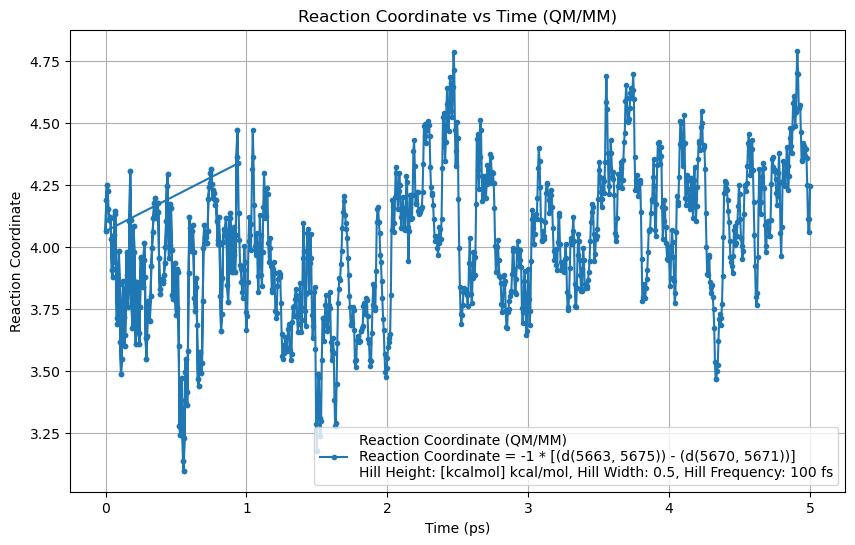

In [7]:
import pandas as pd
import matplotlib.pyplot as plt

# ==================== 1. 数据加载 ====================
# 定义文件路径
colvar_file = '../Outputs/monitor/MONITOR-COLVAR.metadynLog'  # COLVAR文件
metadynamics_inp_file = '../Outputs/monitor/monitor.inp'                # metadynamics参数文件

# 加载 COLVAR 数据 (假设时间在第一列，反应坐标在第二列)
colvar_data = pd.read_csv(colvar_file, delim_whitespace=True, header=None)
colvar_data.columns = ['Time_fs', 'Reaction_Coordinate', 'Col3', 'Col4', 'Col5', 'Col6']

# 将时间从飞秒 (fs) 转换为皮秒 (ps)
colvar_data['Time_ps'] = colvar_data['Time_fs'] / 1000.0

# ==================== 2. 解析 metadynamics 参数 ====================
hill_height, hill_width, hill_frequency = None, None, None  # 初始化参数

# 读取 metadynamics.inp 文件
with open(metadynamics_inp_file, 'r') as file:
    for line in file:
        if 'WW' in line:  # Hill Height
            hill_height = line.split()[1].strip()
        elif 'WIDTH' in line:  # Hill Width
            hill_width = line.split()[1].strip()
        elif 'NT_HILLS' in line:  # Hill Frequency
            hill_frequency = line.split()[1].strip()

# ==================== 3. 添加反应坐标公式 ====================
reaction_coord_formula = r"Reaction Coordinate = -1 * [(d(5663, 5675)) - (d(5670, 5671))]"

# ==================== 4. 绘制反应坐标与时间的关系图 ====================
plt.figure(figsize=(10, 6))
plt.plot(colvar_data['Time_ps'], colvar_data['Reaction_Coordinate'],
         label=(f"Reaction Coordinate (QM/MM)\n{reaction_coord_formula}\n"
                f"Hill Height: {hill_height} kcal/mol, "
                f"Hill Width: {hill_width}, Hill Frequency: {hill_frequency} fs"),
         linestyle='-', marker='.')

# 添加标签、标题和图例
plt.xlabel("Time (ps)")
plt.ylabel("Reaction Coordinate")
plt.title("Reaction Coordinate vs Time (QM/MM)")
plt.legend()
plt.grid()

# 保存图像
plt.savefig('Reaction_Coordinate_vs_Time_QMMM.png', dpi=300)
plt.show()


IsADirectoryError: [Errno 21] Is a directory: '../Outputs/metad1_initmonitor'